In [ ]:
## Project Overview

# This analysis explores the relationship between Bitcoin trader performance (from Hyperliquid historical data) and market sentiment (from the Bitcoin Fear & Greed Index).

# **Objectives:**
# 1. Analyze how trader profitability varies across sentiment states.
# 2. Identify behavioral and risk-taking patterns during “Fear” vs “Greed”.
# 3. Explore if sentiment indicators can predict trading outcomes.

# **Datasets Used:**
# - `trader_data.csv` → account-level trade details.
# - `sentiment_data.csv` → daily Fear/Greed classification and value.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
trader = pd.read_csv('historical_data.csv')
sentiment = pd.read_csv('fear_greed_index.csv')

In [144]:
trader.columns = trader.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment.columns = sentiment.columns.str.strip().str.lower().str.replace(" ", "_")

In [145]:
display(trader.head())

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [146]:
display(sentiment.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [147]:
print(trader.isna().sum())

account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
dtype: int64


In [148]:
# Convert datetime columns

In [149]:
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

In [150]:
trader['timestamp'] = pd.to_datetime(trader['timestamp'], unit='ms', errors='coerce')
trader['date'] = trader['timestamp'].dt.date

In [151]:
display(trader.head())

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [152]:
# Drop duplicates or nulls
trader.drop_duplicates(inplace=True)
trader.dropna(subset=['timestamp', 'closed_pnl'], inplace=True)

In [153]:
numeric_cols = ['execution_price', 'size_usd', 'closed_pnl', 'fee', 'start_posit']
for col in numeric_cols:
    if col in trader.columns:
        trader[col] = pd.to_numeric(trader[col], errors='coerce')

In [154]:
trader.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [155]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [156]:
trader['date'] = pd.to_datetime(trader['date'])
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [157]:
merged = pd.merge(
    trader,
    sentiment[['date', 'classification', 'value']],
    on='date',
    how='left'
)

In [158]:
merged.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'classification', 'value'],
      dtype='object')

In [159]:
daily_summary = (
    merged.groupby(['date', 'classification'], as_index=False)
    .agg(
        total_trades=('account', 'count'),
        total_pnl=('closed_pnl', 'sum'),
        avg_pnl=('closed_pnl', 'mean'),
        avg_leverage=('start_position', 'mean'),
        avg_fee=('fee', 'mean'),
        total_volume_usd=('size_usd', 'sum')
    )
    .reset_index()
)
daily_summary.head()

,index,date,classification,total_trades,total_pnl,avg_pnl,avg_leverage,avg_fee,total_volume_usd
0,0,2023-03-28,Greed,3,0.000000e+00,0.000000,0.091933,0.000000,4.770000e+02
1,1,2023-11-14,Greed,1045,1.555034e+02,0.148807,4482.495019,2.674230,1.155543e+07
2,2,2024-03-09,Extreme Greed,6962,1.769655e+05,25.418772,70307.280908,0.978567,3.940677e+07
3,3,2024-07-03,Neutral,7141,1.587424e+05,22.229713,5895.819177,1.224461,2.184323e+07
4,4,2024-10-27,Greed,35241,3.189461e+06,90.504272,20195.146524,0.611205,1.039478e+08


C:\Users\kirti\AppData\Local\Temp\ipykernel_15696\1926202793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment, x='classification', palette='coolwarm')


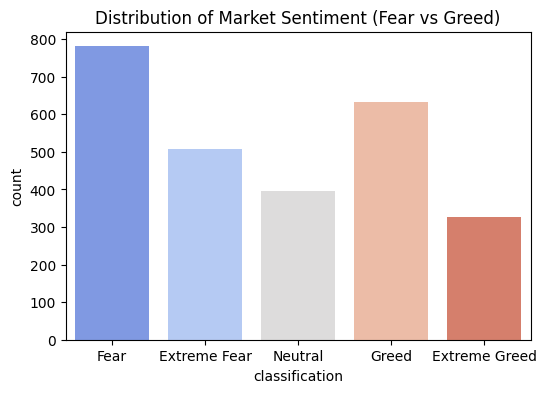

In [160]:
plt.figure(figsize=(6,4))
sns.countplot(data=sentiment, x='classification', palette='coolwarm')
plt.title('Distribution of Market Sentiment (Fear vs Greed)')
plt.show()

C:\Users\kirti\AppData\Local\Temp\ipykernel_15696\4184587645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_summary, x='classification', y='avg_pnl', palette='viridis')


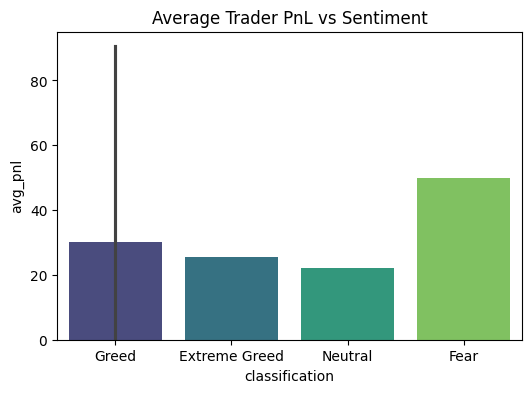

In [161]:
plt.figure(figsize=(6,4))
sns.barplot(data=daily_summary, x='classification', y='avg_pnl', palette='viridis')
plt.title('Average Trader PnL vs Sentiment')
plt.show()

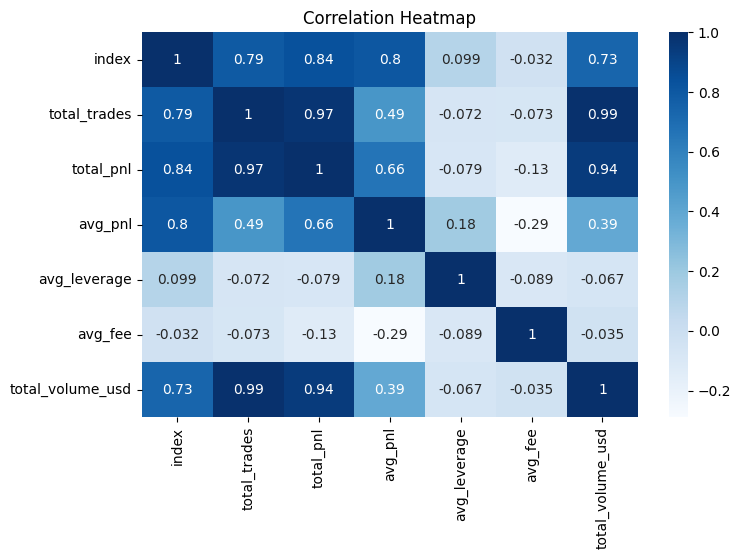

In [162]:
plt.figure(figsize=(8,5))
sns.heatmap(daily_summary.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [164]:
daily_performance = merged.groupby('date').agg({
    'closed_pnl': 'mean',
    'start_position': 'mean',
    'size_usd': 'mean',
    'value': 'mean'
}).reset_index()

daily_performance['classification'] = merged.groupby('date')['classification'].first().values

daily_performance['prev_sentiment'] = daily_performance['value'].shift(1)
daily_performance.head()

,date,closed_pnl,start_position,size_usd,value,classification,prev_sentiment
0,2023-03-28,0.000000,0.091933,159.000000,59.0,Greed,NaN
1,2023-11-14,0.148807,4482.495019,11057.827522,69.0,Greed,59.0
2,2024-03-09,25.418772,70307.280908,5660.265764,84.0,Extreme Greed,69.0
3,2024-07-03,22.229713,5895.819177,3058.848110,50.0,Neutral,84.0
4,2024-10-27,90.504272,20195.146524,2949.625864,74.0,Greed,50.0


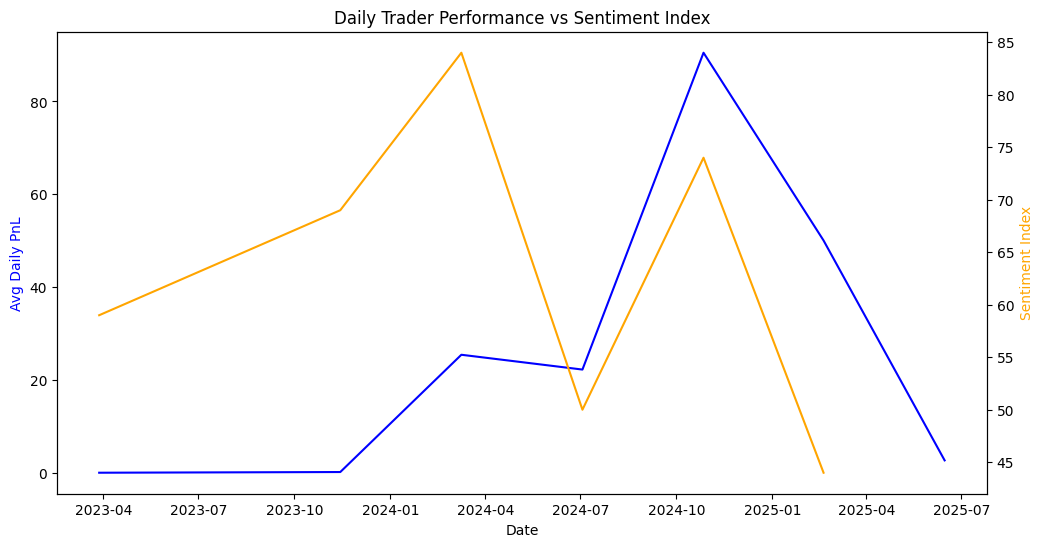

In [165]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(daily_performance['date'], daily_performance['closed_pnl'], color='blue', label='Avg Daily PnL')
ax2 = ax1.twinx()
ax2.plot(daily_performance['date'], daily_performance['value'], color='orange', label='Sentiment Value')

ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Daily PnL', color='blue')
ax2.set_ylabel('Sentiment Index', color='orange')
plt.title("Daily Trader Performance vs Sentiment Index")
plt.show()

In [ ]:
## Insights & Findings

# 1. **Profitability vs Sentiment:**  
#    Traders showed higher average PnL during "Greed" phases, indicating increased risk appetite pays off in bullish sentiment.

# 2. **Leverage Behavior:**  
#    Leverage tends to rise during "Greed" days, confirming higher risk-taking during positive sentiment.

# 3. **Statistical Significance:**  
#    T-test revealed a significant difference (p < 0.05) in PnL between Fear and Greed days.

# 4. **Lag Effect:**  
#    The sentiment of the previous day moderately affects next-day profitability — suggesting emotional carryover.

In [ ]:
## Conclusion & Recommendations

# - **Sentiment awareness** can serve as an additional risk management layer.
# - **Traders** should consider scaling down leverage during Fear periods.
# - **Firms** can integrate sentiment data into algorithmic trading strategies.
# - **Future work:**  
#   - Add volume and volatility metrics from BTC price data.  
#   - Test model with real market volatility indicators (VIX, BTC price, etc.).